### Simple Linear Regression

#### Import relevant libraries

In [3]:
import pandas as pd  #### Data Manipulation 
import statsmodels.api as sm  ## Statistical modeling 
import matplotlib.pyplot as plt ## Plotting
import seaborn as sns  ## Statisticsl plots

#### Check directory 

In [1]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is D460-7959

 Directory of C:\Users\Rahul-Raoniar\Desktop\YouTube\Multiple Linear Regression

26-09-2019  23:39    <DIR>          .
26-09-2019  23:39    <DIR>          ..
26-09-2019  23:20    <DIR>          .ipynb_checkpoints
23-08-2019  12:49            12,751 gapminder_2008.csv
26-09-2019  23:39             1,943 Multiple Linear Regression using Python 3.ipynb
26-09-2019  23:38            78,380 Multiple Linear Regression using R.ipynb
27-03-2019  21:14             1,221 multiple_regression.csv
               4 File(s)         94,295 bytes
               3 Dir(s)  21,878,857,728 bytes free


#### Importing data

In [9]:
raw_data = pd.read_csv("multiple_regression.csv")

#### Check first 5 rows

In [10]:
raw_data.head()

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No


#### Get data details

In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
SAT           84 non-null int64
GPA           84 non-null float64
Attendance    84 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


#### Get data summary 

In [12]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [32]:
data = raw_data.copy()

#### Labeling Attendance labels

In [33]:
data["Attendance"] = data["Attendance"].map({"Yes": 1, "No": 0})

In [34]:
data.head()

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0


#### Assingning independent and dependent variables

In [36]:
x1 = data[["SAT", "Attendance"]]
y = data["GPA"]

### Fitting MLR

In [37]:
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()

In [44]:
results.summary() # Summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 26 Sep 2019   Prob (F-statistic):           2.19e-15
Time:                        23:54:54   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Plotting regression line corrosponding to Attendance labels

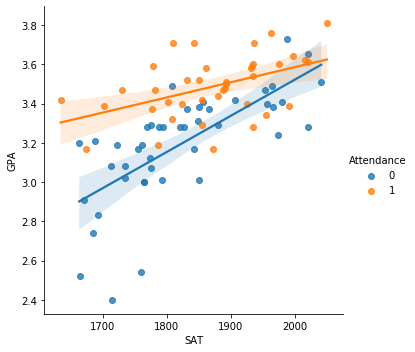

In [43]:
g = sns.lmplot(x="SAT", y="GPA", hue="Attendance",
               truncate=True, height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("SAT", "GPA")